<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 2 (Assignment) -- Working with datasets</h2>

# Exercise 0
Before tackling all those exciting tasks of this notebook, the neccessary Python modules need to be loaded. Have a look at the notebook discussed during the lecture, and import the following modules/symbols:

- <code>u2_utils</code>
- <code>seaborn</code>
- <code>numpy</code>
- <code>matplotlib.pyplot</code>
- <code>sklearn.naive_bayes.GaussianNB</code>
- <code>sklearn.ensemble.RandomForestClassifier</code>
- <code>xgboost</code>
- <code>sklearn.model_selection.train_test_split</code>
- <code>sklearn.neighbors.KNeighborsClassifier</code>
- <code>sklearn.datasets</code>
- <code>pandas</code>

In [1]:
import u2_utils as u2
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import DMatrix, XGBClassifier 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


Afterwards, check if the <code>numpy</code> module was correctly imported, by computed the <i>arithmetic mean</i> of <code>[4, 3, 6]</code> and printing the result.

In [2]:
np.mean([4, 3, 6])


4.333333333333333

# Exercise 1
In this exercise, you will be working with a data set composed of various measurements of different <i>wine</i> attributes (e.g. the <i>alcohol concentration</i>). It was published/donored by <i>S. Aeberhard</i> and originally gathered by:

<cite>Forina, M. et al, PARVUS - 
An Extendible Package for Data Exploration, Classification and Correlation. 
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 
16147 Genoa, Italy.</cite>

This time, we won't give you a description of the data set, as your <b>first task</b> requires you to get more familiar with it on your own. In order to achieve this, perform the following steps:

- Load the <i>wine</i> data set.
- Look at the <i>last</i> eight samples of the data set.


- ... and follow any further instructions.

In [3]:
wine = u2.load_wine()
col = wine.columns[:-1]
X = wine[col]
print(X[-8:],"\n")


     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
170    12.20        3.03  2.32               19.0       96.0           1.25   
171    12.77        2.39  2.28               19.5       86.0           1.39   
172    14.16        2.51  2.48               20.0       91.0           1.68   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
170        0.49                  0.40             0.73         5.500000  0.66   
171        0.51                  0.48             0.64         9.899999  0.57   
172        0.70                  0.44        

Now you know more about the structure and features of your data set, but depending on the <i>target</i> type, different analysis approaches need to be applied. Are you being confronted with a <i>regression</i> or a <i>classification</i> task? Maybe you can find the answer when looking at the columns of the data set.

<i>Print</i> the corresponding column name as well as the corresponding value of the $42^{nd}$ element.

In [4]:
print(X[41:42:])
# because 0 is the first element


    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
41    13.41        3.84  2.12               18.8       90.0           2.45   

    flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
41        2.68                  0.27             1.48             4.28  0.91   

    od280/od315_of_diluted_wines  proline  
41                           3.0   1035.0  


As most data sets consist of samples which are described by a vast amount of features, <i>dimensionality reduction</i> techniques come in very handy. Especially for visualisation purposes, projecting samples down to <i>two</i> or <i>three</i> components is a great start on getting your hands on the data set. Talking about something is all nice, but actually doing it is quite another thing. Keep in mind, which columns should be <i>considered</i>, and which should be <i>ignored</i>.

- Choose an approach for dimensionality reduction.
- Reduce the wine data set to $d = 2$ as well as $d = 3$.
- Visualize the resulting data in a colored <i>scatter plot</i>.

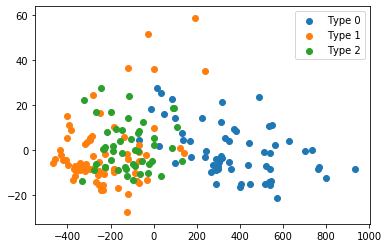

In [5]:
%matplotlib inline
feature_names = wine.columns[:-1]
X = wine[feature_names]
y = wine['target']
wine_reduced_pca = u2.apply_PCA(n_components=2, data=X)
u2.plot_points_2d_wine(wine_reduced_pca, wine)


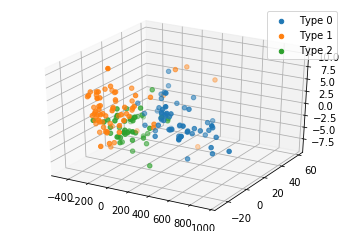

In [6]:
%matplotlib inline
wine_reduced_pca = u2.apply_PCA(n_components=3, data=X)
u2.plot_points_3d_wine(wine_reduced_pca, wine)


Projecting data sets down, as well as experimenting with different settings of hyperparamaters of subsequent clustering algorithms, may be a good start to get more familiar with the data set, nonetheless one hits the wall pretty fast. Moreover, we are interested in using as much useful information as possible, but dimensionality reduction techniques essentially drop <i>some</i> of the variance intrinsic to the data. Hence, it is always a good idea to look for <i>correlations</i> in the data, maybe some features <i>can</i> be dropped without losing insightful details.

Your <b>second task</b> comprises the following:

- Display and analyze possible correlations in the data using <i>all</i> features.
- Concentrate on and display correlations of the features <code>total_phenols</code>, <code>flavanoids</code> and <code>color_intensity</code>.

Do you observe some correlations?

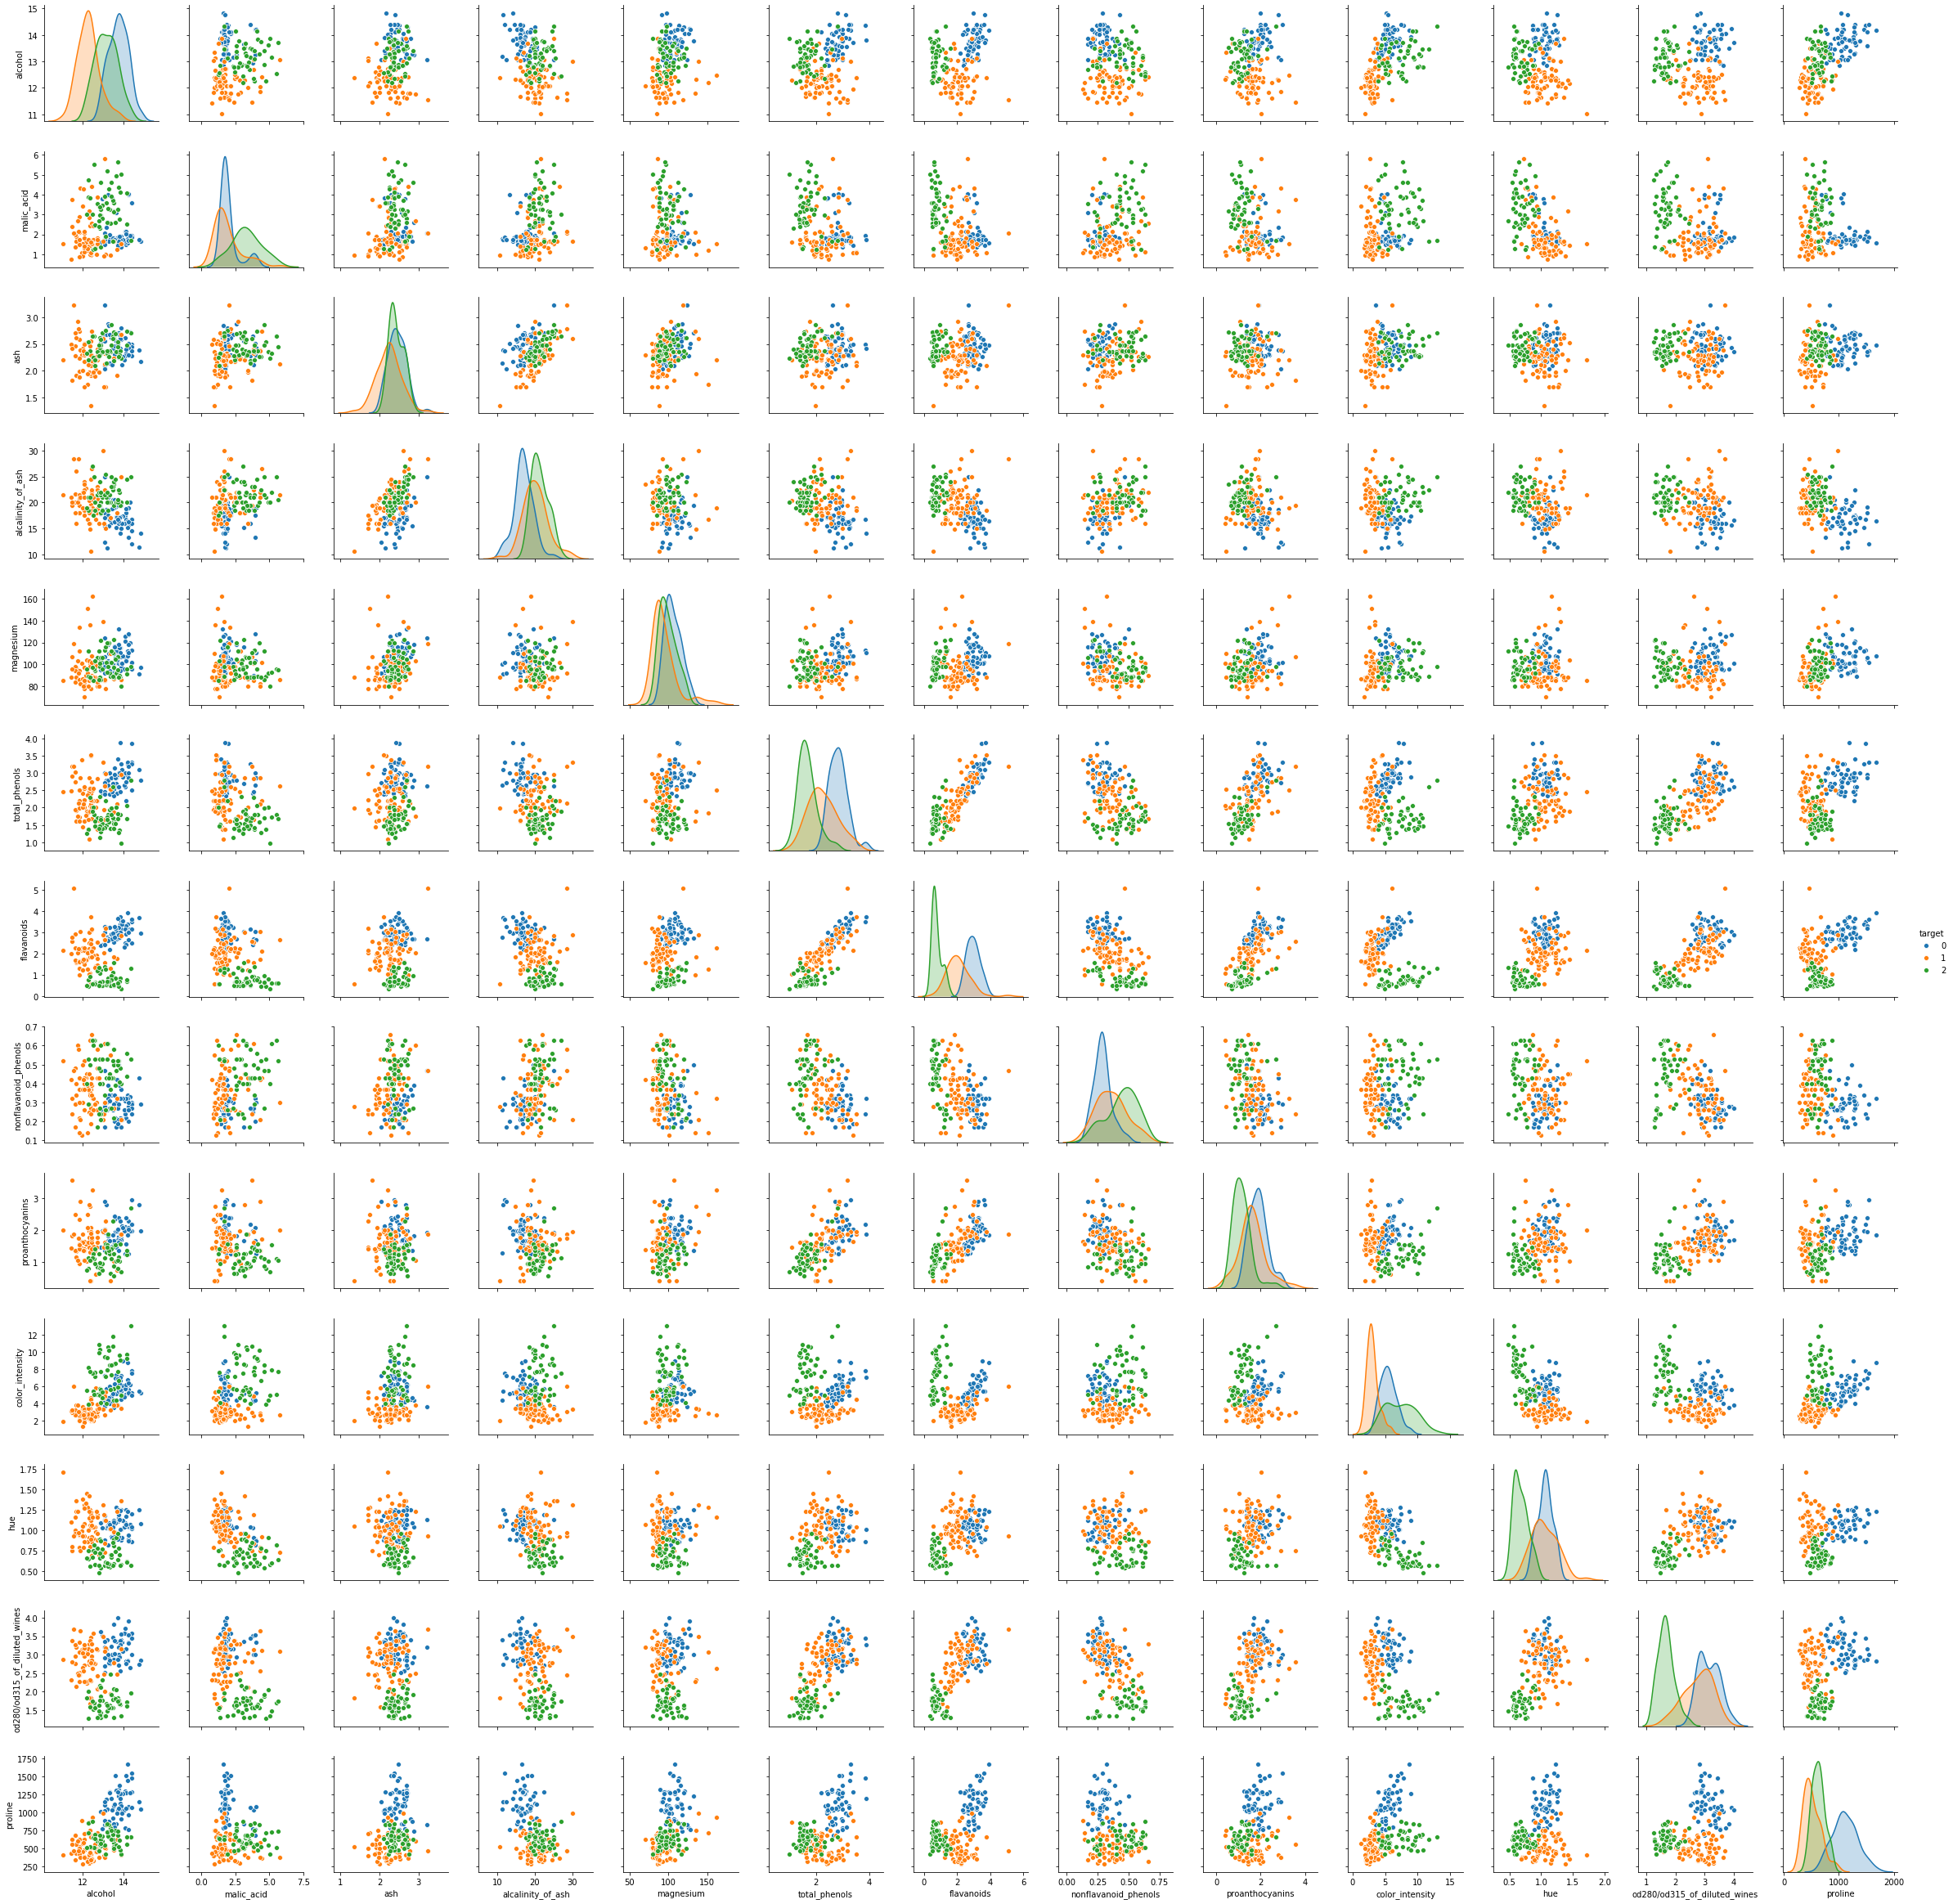

In [7]:
feature_names = wine.columns[:-1]
%matplotlib inline
sns.pairplot(wine, vars=feature_names.values, hue="target");


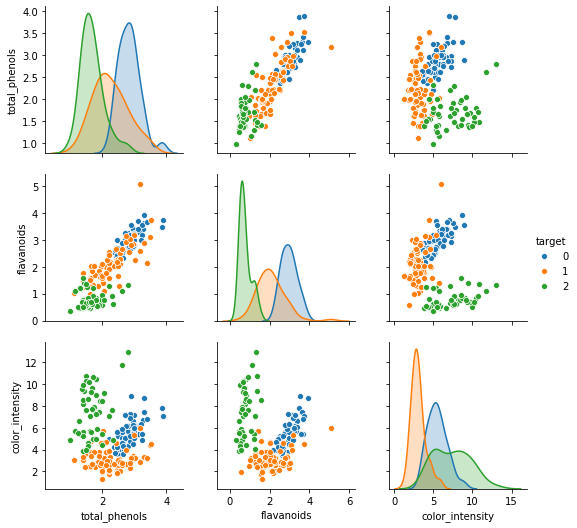

In [8]:
%matplotlib inline
list_of_features = ['total_phenols', 'flavanoids', 'color_intensity']
sns.pairplot(wine, vars=list_of_features, hue="target");


Do you observe some correlations?

1. task - Display and analyze possible correlations in the data using all features:
Yes, for example, between total_phenols and od280/od315_of_diluted_wines or between proline and alcohol
    
    
2. task - Concentrate on and display correlations of the features total_phenols, flavanoids and color_intensity:
Good or middling correlation between total_phenols and flavanoids


# Exercise 2
After digging into the depths of the data set of choice (or in question), the next step is to actually apply methods of <i>machine learning</i>. Otherwise, especially if data sets get more complex (and they <i>will</i>), manually analyzing them by downprojection and visualization is a bit of a hassle – and often do not lead to the desired results.

As discussed during the lecture, before applying <i>any</i> algorithm, it is best to separate some samples, which act as the <i>test set</i>. Ultimately, we want to test our trained model on <i>unseen</i> data. Your <b>first task</b> of this exercise requires you to perform the following steps:

- Split the <i>wine</i> data set in a way, so that the <i>test</i> set contains exactly $30$ samples.
- Train a <i>$k$-nearest neighbors classifier</i> using $k=1\ldots{}5$, step size of $1$.
- Print the respective score gathered by applying the fitted classifier on the <i>test set</i>.

Repeat the previous <i>three</i> steps multiple times, what do you observe?

In [9]:
X = wine[feature_names]
y = wine['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30/178)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30/178)

k=1
for k in range(1, 6, 1):
    n_neighbors=k
    knn = KNeighborsClassifier(n_neighbors)
    print('\n', k, "neighbor(s)")
    knn.fit(X_train, y_train)
    print(knn.score(X_test, y_test))
    n_neighbors += 1
    


 1 neighbor(s)
0.9

 2 neighbor(s)
0.8333333333333334

 3 neighbor(s)
0.7

 4 neighbor(s)
0.8

 5 neighbor(s)
0.6666666666666666


The scores are between circa 0.5 and 0.8. Moreover, the number of neighbors between 1 and 5 seems to influence the score. I have observed that only one neighbor to compare often leads to the best score. 

It would be interesting to know, how the <i>decision boundaries</i> of some specific combinations of features (with respect to the previous <i>correlation</i> analysis) look like. For this very purpose, use $k=3$ and display the decision boundaries of:

- ... <code>total_phenols</code> and <code>color_intensity</code>.
- ... <code>total_phenols</code> and <code>flavanoids</code>.
- ... <code>flavanoids</code> and <code>color_intensity</code>.

Are some combinations more suited to separate the data set than others?

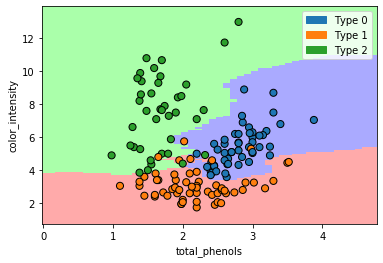

In [11]:
list_of_features = ['total_phenols', 'color_intensity']
X = wine[list_of_features]
y = wine['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30/178)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

u2.plot_wine_classifier(knn, X_train, y_train)


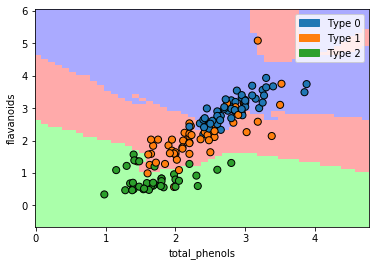

In [12]:
list_of_features = ['total_phenols', 'flavanoids']
X = wine[list_of_features]
y = wine['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30/178)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
u2.plot_wine_classifier(knn, X_train, y_train)


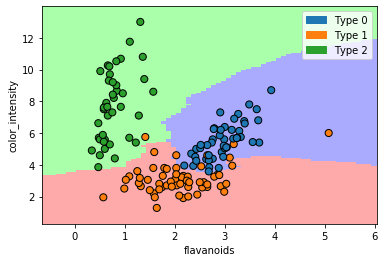

In [13]:
list_of_features = ['flavanoids', 'color_intensity']
X = wine[list_of_features]
y = wine['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30/178)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
u2.plot_wine_classifier(knn, X_train, y_train)


The combinations 'total_phenols', 'color_intensity' and 'flavanoids', 'color_intensity' seem to be coequal. They seem to be better than the combination 'total_phenols', 'flavanoids'.

Before applying more complex <i>machine learning</i> methods, a short recapitulation of <i>underfitting</i> and <i>overfitting</i> might be quite appropriate. Given the following interesting function definition, the <i>Weierstrass function</i> (which is continuous, but <i>not</i> differentiable):

In [14]:
n_samples = 50
def function(x, b: float = 20):
    assert b >= 7
    a = (1 + ((3 * np.pi) / 2)) / b
    a *= 1.01
    assert 0 < a < 1
    return np.sum([np.power(a, n) * np.cos(np.power(b, n) * np.pi * x) for n in range(100)], axis=0)


Your <b>second task</b> of this exercise is to visualize the <i>Weierstrass function</i>
- <i>without</i> additional noise.
- <i>with</i> noise on the <code>y</code> vector (use a noise level of $0.12$).
- Fit the data points with a polynomial of degrees $n = \{1,6,30,150\}$.


What do you observe (with an emphasis on the boundaries of the visible function plot)? Is it even possible to fit the <i>original</i> function in a proper way? Moreover, experiment with the parameter <code>b</code> of the Weierstrass function, maybe <i>pretty high</i> values eases the fitting process.

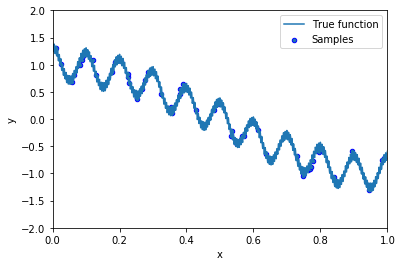

In [15]:
X = np.sort(np.random.rand(n_samples))
y = function(X)
u2.plot_function(X, y, function)


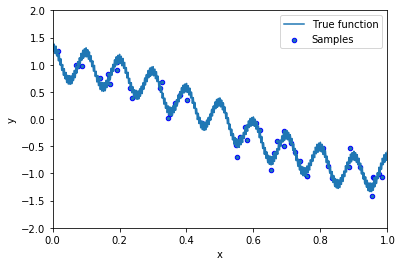

In [16]:
X = np.sort(np.random.rand(n_samples))
y = function(X) + np.random.randn(n_samples) * 0.12
u2.plot_function(X, y, function)


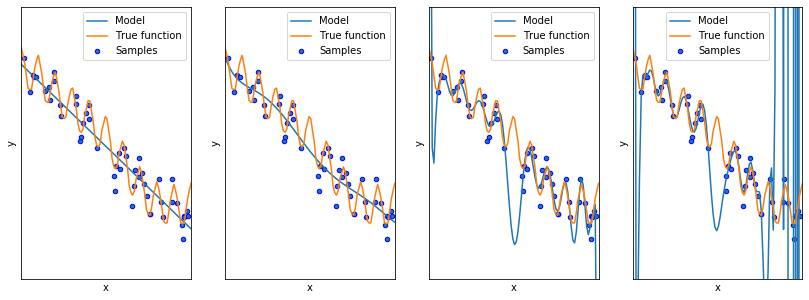

In [17]:
degrees = [1, 6, 30, 150] 
u2.plot_function_fit(X, y, function, degrees)



A function with the degree 1 is linear and has so no chance in fitting a more complex model. A function with degree of 6 can imitate the curve of the real function but not the small waves. It is too simple. The function with degrees of 30 and 150 fits the samples more or less well but can't reflect the function behind that data points. So, they seem to overfit. 

Parameter b doesn't seem to help that the functions matches better togehter. Furthermore, the degree of models seems to be well between circa 26 and 42. Very high degrees of models don't help in fitting anymore. 
An optimized fitting doesn't exist it seems.


# Exercise 3
As the last exercise of this assignment, you will get your hands dirty by experimenting with more sophisticated machine learning methods. For this very purpose, your <b>first task</b> requires you the following steps:

- Train a <i>Naive Bayes</i> classifier on the <i>wine</i> data set using <i>all</i> features.
- Print the <i>score</i> of the trained classifier using the <i>training</i> as well as the <i>test</i> set.

In [18]:
feature_names = wine.columns[:-1]
X = wine[feature_names]
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30/178)

clf = GaussianNB()
clf.fit(X_train, y_train)

print('wine dataset:')
print('Accuracy of Gaussian Naive Bayes classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))
print('Accuracy of Gaussian Naive Bayes classifier on test set: {:.2f}'
      .format(clf.score(X_test, y_test)))


wine dataset:
Accuracy of Gaussian Naive Bayes classifier on training set: 0.99
Accuracy of Gaussian Naive Bayes classifier on test set: 0.97


It would be interesting to know, how the <i>decision boundaries</i> of some specific combinations of features (with respect to the previous <i>correlation</i> analysis of <i>exercise 2</i>) look like. For this very purpose, apply <i>Naive Bayes</i> and display the decision boundaries of:

- ... <code>total_phenols</code> and <code>color_intensity</code>.
- ... <code>total_phenols</code> and <code>flavanoids</code>.
- ... <code>flavanoids</code> and <code>color_intensity</code>.

Are some combinations more suited to separate the data set than others?

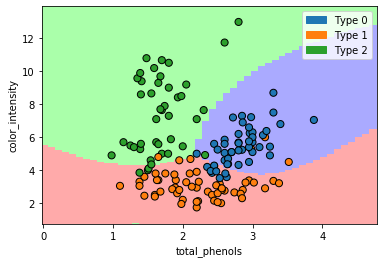

In [19]:
%matplotlib inline
list_of_features = ['total_phenols', 'color_intensity']
list_of_labels = ['Type 0', 'Type 1', 'Type 2']
X = wine[list_of_features]
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30/178)

clf = GaussianNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
u2.plot_wine_classifier(clf, X_train, y_train)


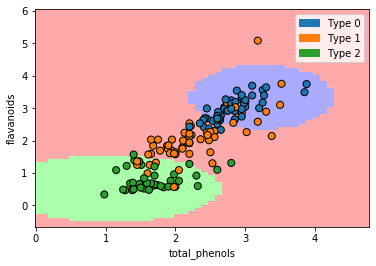

In [20]:
%matplotlib inline
list_of_features = ['total_phenols', 'flavanoids']
list_of_labels = ['Type 0', 'Type 1', 'Type 2']
X = wine[list_of_features]
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30/178)

clf = GaussianNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
u2.plot_wine_classifier(clf, X_train, y_train)


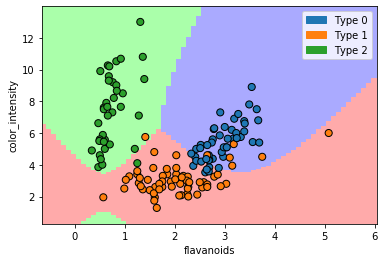

In [21]:
%matplotlib inline
list_of_features = ['flavanoids', 'color_intensity']
list_of_labels = ['Type 0', 'Type 1', 'Type 2']
X = wine[list_of_features]
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30/178)

clf = GaussianNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
u2.plot_wine_classifier(clf, X_train, y_train)


The combination flavanoids and color_intesity seems to be the best of the three, because there are only a few samples/points which are related to the wrong color. The combinations total_phenols, color_intensity and combination total_phenols and flavanoids have more wrong classifications.

Your <b>second task</b> is pretty similar to the first of this exercise, with the difference of applying a <i>Random Forest</i> instead of a <i>Naive Bayes</i> classifier.

- Train a <i>Random Forest</i> classifier on the <i>wine</i> data set using <i>all</i> features.
- Print the <i>score</i> of the trained classifier using the <i>training</i> as well as the <i>test</i> set.

In [22]:
feature_names = wine.columns[:-1]
X = wine[feature_names]
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30/178)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print('Wine dataset:')
print('Accuracy of Random Forest classifier on training set: {:.2f}'
      .format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
      .format(rf.score(X_test, y_test)))


Wine dataset:
Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.97


Again, it would be interesting to know, how the <i>decision boundaries</i> of some specific combinations of features (with respect to the previous <i>correlation</i> analysis of <i>exercise 2</i>) look like. For this very purpose, apply <i>Random Forest</i> and display the decision boundaries of:

- ... <code>total_phenols</code> and <code>color_intensity</code>.
- ... <code>total_phenols</code> and <code>flavanoids</code>.
- ... <code>flavanoids</code> and <code>color_intensity</code>.

Are some combinations more suited to separate the data set than others? Experiment with different hyperparameter settings.

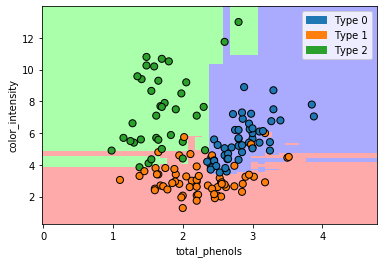

In [23]:
%matplotlib inline
list_of_features = ['total_phenols', 'color_intensity']
X = wine[list_of_features]
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30/178)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)
u2.plot_wine_classifier(rf, X_train, y_train)


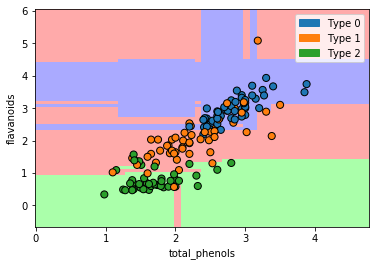

In [24]:
%matplotlib inline
list_of_features = ['total_phenols', 'flavanoids']
X = wine[list_of_features]
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30/178)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)
u2.plot_wine_classifier(rf, X_train, y_train)


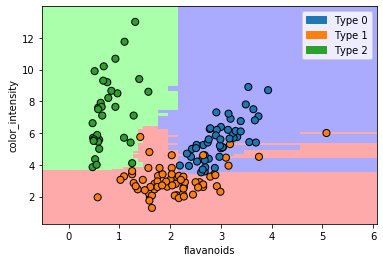

In [25]:
%matplotlib inline
list_of_features = ['flavanoids', 'color_intensity']
X = wine[list_of_features]
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30/178) # 30/178 as percent calculation:
# value between 0 and 1
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)
u2.plot_wine_classifier(rf, X_train, y_train)



   a) ... total_phenols and color_intensity.
   b) ... total_phenols and flavanoids.
   c) ... flavanoids and color_intensity.
The test_size was varied. 
For test_size = 0,5: a) and c) were coequal and better than b).
For test_size = 0.1: Also here a) and c) were coequal and better than b).
For test_size = 0.9: For instance, there were no errors/false sorting for a) and c). However, b) had an error.
In conclusion, a) and c) seem to be the better combinations.

As the <b>third task</b> of this exercise, you are required to experiment with <i>XGBoost</i> by following these steps:

- Train an <i>XGBoost</i> classifier on the <i>wine</i> data set using <i>all</i> features.
- Print the <i>score</i> of the trained classifier using the <i>training</i> as well as the <i>test</i> set.

In [26]:
feature_names = wine.columns[:-1]
X = wine[feature_names]
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30/178)

xgc = XGBClassifier(max_depth=7,
                        learning_rate=0.1,
                        n_estimators=500,
                        silent=True,
                        objective='binary:logistic',
                        gamma=0,
                        max_delta_step=0,
                        subsample=1,
                        colsample_bytree=1,
                        colsample_bylevel=1,
                        reg_alpha=0,
                        reg_lambda=0,
                        scale_pos_weight=1,
                        wine=1,
                        missing=None)

xgc.fit(X_train, y_train)

print('Wine dataset:')
print('Accuracy of XGB classifier on training set: {:.2f}'
      .format(xgc.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
      .format(xgc.score(X_test, y_test)))


Wine dataset:
Accuracy of XGB classifier on training set: 1.00
Accuracy of XGB classifier on test set: 1.00


As for the previous methods, it would be interesting to know, how the <i>decision boundaries</i> of some specific combinations of features (with respect to the previous <i>correlation</i> analysis of <i>exercise 2</i>) look like. For this very purpose, apply <i>XGBoost</i> and display the decision boundaries of:

- ... <code>total_phenols</code> and <code>color_intensity</code>.
- ... <code>total_phenols</code> and <code>flavanoids</code>.
- ... <code>flavanoids</code> and <code>color_intensity</code>.

Are some combinations more suited to separate the data set than others? Experiment with different hyperparameter settings.

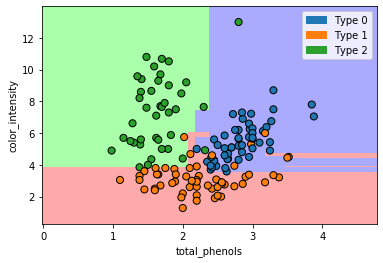

In [27]:
%matplotlib inline
list_of_features = ['total_phenols', 'color_intensity']
X = wine[list_of_features]
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30/178)
xgc = XGBClassifier(max_depth=7,
                        learning_rate=0.1,
                        n_estimators=500,
                        silent=True,
                        objective='binary:logistic',
                        gamma=1,
                        max_delta_step=0,
                        subsample=1,
                        colsample_bytree=1,
                        colsample_bylevel=1,
                        reg_alpha=0,
                        reg_lambda=0,
                        scale_pos_weight=1,
                        wine=1,
                        missing=None)

xgc.fit(X_train, y_train)
xgc.score(X_test, y_test)
u2.plot_wine_classifier(xgc, X_train, y_train)


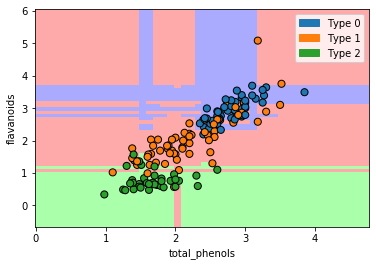

In [28]:
%matplotlib inline
list_of_features = ['total_phenols', 'flavanoids']
X = wine[list_of_features]
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30/178)
xgc = XGBClassifier(max_depth=7,
                        learning_rate=0.1,
                        n_estimators=500,
                        silent=True,
                        objective='binary:logistic',
                        gamma=0,
                        max_delta_step=0,
                        subsample=1,
                        colsample_bytree=1,
                        colsample_bylevel=1,
                        reg_alpha=0,
                        reg_lambda=0,
                        scale_pos_weight=1,
                        wine=1,
                        missing=None)

xgc.fit(X_train, y_train)
xgc.score(X_test, y_test)
u2.plot_wine_classifier(xgc, X_train, y_train)


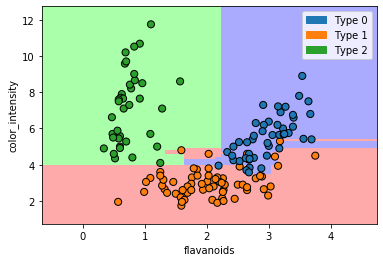

In [29]:
%matplotlib inline
list_of_features = ['flavanoids', 'color_intensity']
X = wine[list_of_features]
y = wine['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30/178)
xgc = XGBClassifier(max_depth=7,
                        learning_rate=0.1,
                        n_estimators=500,
                        silent=True,
                        objective='binary:logistic',
                        gamma=0,
                        max_delta_step=0,
                        subsample=1,
                        colsample_bytree=1,
                        colsample_bylevel=1,
                        reg_alpha=0,
                        reg_lambda=0,
                        scale_pos_weight=1,
                        wine=1,
                        missing=None)

xgc.fit(X_train, y_train)
xgc.score(X_test, y_test)
u2.plot_wine_classifier(xgc, X_train, y_train)



a)    ... total_phenols and color_intensity.
b)    ... total_phenols and flavanoids.
c)    ... flavanoids and color_intensity.
All three combinations perform over different parameters very well. Especially, b) seems to perform very good. It seems to rate correctly more often than a) and c). Moreover, in b) the boundaries are very accurate.

All three algorithms reach very high scores above 95 %. 

The <b>last task</b> of this exercise requires you to discuss differences between the results of all three machine learning methods, applied onto the wine data set. As some hints for getting started, emphasize – among others – the following things:

- Performance on <i>training</i> as well as <i>test</i> set.
- Differences in the <i>decision boundaries</i>, especially between <i>Random Forest</i> and <i>XGBoost</i>.

Moreover, as at the beginning of this assignment, we won't give you a description of the data sets you are analyzing, so you are required to get more familiar with it on your own. For curious minds, more information is available at:

<cite>Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) “Least Angle Regression,” Annals of Statistics (with discussion), 407-499.</cite>

In order to achieve this, perform the following steps:

- Load the <i>diabetes</i> data set.
- Look at the <i>first</i> seven samples of the data set.

Are you dealing with a <i>classification</i> or <i>regression task</i> data set?

In [30]:
diabetes = u2.load_diabetes()
diabetes[:7]


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0


Additionally, apply <i>XGBoost</i> on the newly loaded data set and observe the development of both, the <i>training</i> as well as the <i>test</i> error. To achieve this, perform the following steps:

- Split the <i>diabetes</i> data set in a way, so that the <i>test</i> set contains exactly $45$ samples.
- Display development of <i>training</i> and <i>test</i> errors with respect to <i>XGBoost</i>.

Can you observe <i>underfitting</i>/<i>overfitting</i> (default hyperparameter settings, except the <i>objective</i>)?

[0]	test-rmse:141.005	train-rmse:124.422
[1]	test-rmse:110.431	train-rmse:94.0714
[2]	test-rmse:90.4457	train-rmse:72.1664
[3]	test-rmse:77.4748	train-rmse:57.3898
[4]	test-rmse:69.712	train-rmse:46.3091
[5]	test-rmse:66.3764	train-rmse:38.4188
[6]	test-rmse:63.7459	train-rmse:33.6903
[7]	test-rmse:61.3907	train-rmse:30.1821
[8]	test-rmse:60.1089	train-rmse:27.5007
[9]	test-rmse:59.591	train-rmse:25.2081
[10]	test-rmse:59.094	train-rmse:23.2611
[11]	test-rmse:58.538	train-rmse:22.178
[12]	test-rmse:59.4998	train-rmse:20.3912
[13]	test-rmse:59.3732	train-rmse:19.0707
[14]	test-rmse:59.3229	train-rmse:18.6963
[15]	test-rmse:59.4599	train-rmse:17.475
[16]	test-rmse:59.5769	train-rmse:16.4417
[17]	test-rmse:59.9638	train-rmse:15.9637
[18]	test-rmse:60.1178	train-rmse:15.0919
[19]	test-rmse:60.1208	train-rmse:14.1131
[20]	test-rmse:60.2332	train-rmse:13.4059
[21]	test-rmse:60.3201	train-rmse:12.6465
[22]	test-rmse:60.3309	train-rmse:12.3757
[23]	test-rmse:60.4984	train-rmse:11.8255
[24]	tes

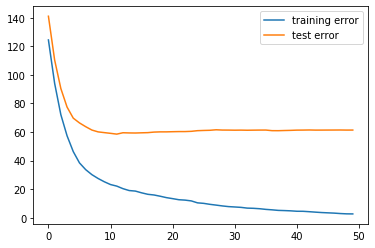

In [34]:
import xgboost as xgb
a = diabetes.columns[:-1]
X = diabetes[a]
y = diabetes['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=45/442)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'objective': 'reg:squarederror'}
u2.watch_training_test_error(dtrain, dtest, params, num_boost_rounds=50)


There exists an overfitting because the test error increasing slightly at the same time when the training error decreases.